In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')

# Optimal width plots

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [6]:
def load_opt_w_data(names_of_lines):

    data = {}
    for name in names_of_lines:  

        data[f"A_area_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_area_{name}", name)
        )
        data[f"A_wavl_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_wavl_{name}", name)
        )
        data[f"Deltas_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"Deltas_{name}", name)
        )


    return data



lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

reload(un)
data = load_opt_w_data(lines)
# disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['A_area_Ha17', 'A_wavl_Ha17', 'Deltas_Ha17', 'A_area_CaK17', 'A_wavl_CaK17', 'Deltas_CaK17', 'A_area_CaII17', 'A_wavl_CaII17', 'Deltas_CaII17'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17872\976252686.py:14: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


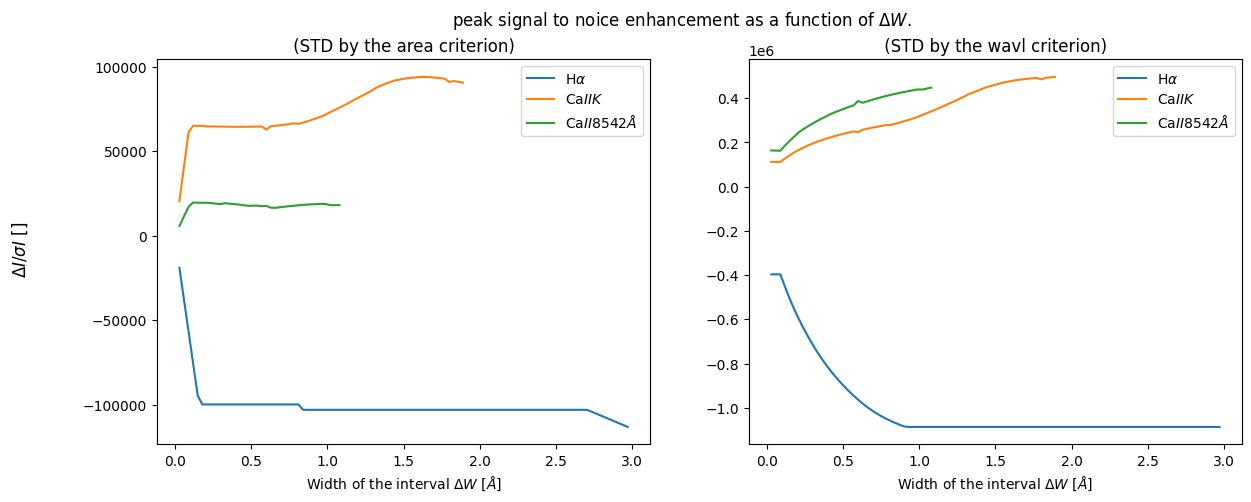

In [7]:
def plot_peak_enhancement(data, names_of_lines, long_names):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(r'peak signal to noice enhancement as a function of $\Delta W$.')
    fig.supylabel(r'$\Delta I/\sigma I$ []')
    ax_peak_enhancement(ax[0], data, names_of_lines, long_names, criterion='area')
    ax_peak_enhancement(ax[1], data, names_of_lines, long_names, criterion='wavl')
    plt.show()
    
    
def ax_peak_enhancement(ax, data, names_of_lines, long_names, criterion):
    for name in names_of_lines:
        A = data[f"A_area_{name}"] if criterion=="area" else data[f"A_wavl_{name}"]
        Deltas = data[f"Deltas_{name}"]
        MAX = np.nanmax(A, axis=1)
        ax.plot(Deltas, MAX, label=long_names[name])
        ax.set_title(f' (STD by the {criterion} criterion) ')
        ax.set_xlabel(r"Width of the interval $\Delta W$ $[\AA]$")

    ax.legend()

plot_peak_enhancement(data, lines, long_names)

In [9]:
Full_line_ana(fig, ax, names_of_lines_list, scalefactor, name_of_flare='', name_of_show_line=None, data=None):
if data is None:
        data = get_data(names_of_lines_list)
    for i, name in enumerate(names_of_lines_list):
        wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, 
                                                          area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        
        
def contrast_FOV_data(name_of_line, data, quiet_sun_subtraction=True, num=100, normal=True, scale_pix_to_saas=1/53.4):
    return wav, DFOV*corr , time, line, std*corr


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [60]:

def stn_direct(weight_func, wav, DI, std):
    """_summary_

    Args:
        DI ((n_time, n_wav)-numpy array): difference intencity 
        std ((n_wav)-numpy array): the standard deviations for the standard deviations
        weight_func (function): A function returning the weight at any wavelength. 
        wav ((n_wav)-numpy array): the wavelength positions of the diff_spectr observations | (float)- the averaged std over the wavelengths. 

    Returns:
        (n_time)-arr: int (I(t,w)/std(w)) * g(w) array containing the weighted signal to noise ratio for the provided weights. 
    """
    weights = weight_func_to_weights(weight_func, wav)
    DS = DI / std
    return np.dot(DS, weights) # check if this is in the right order. 


def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])

# def weight_func_to_weights(weight_func, wav):
#     n = len(wav)
#     def i_unit_weight(i):
#         v = np.zeros(n)
#         v[i] = 1
#         f = lambda w : interp1d(wav,v)(w) * weight_func(w)
#         print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
#         return quad(f, wav[0], wav[-1])[0]
#     return np.array([i_unit_weight(i) for i in range(n)])
# possible weight functions 
def indicator_function(a,b):
    return lambda x : np.where(x > a, 1,0) * np.where( x < b ,  1, 0)

In [61]:
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 


lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

data = get_data(lines)


[[6.56131879e+03 6.56181879e+03 6.56201879e+03 6.56221879e+03
  6.56251879e+03 6.56266879e+03 6.56281879e+03 6.56296879e+03
  6.56311879e+03 6.56341879e+03 6.56361879e+03 6.56381879e+03
  6.56431879e+03]
 [8.18242360e-01 7.69945519e-01 7.29005290e-01 6.10015586e-01
  2.63634766e-01 2.21668118e-01 2.11332035e-01 2.25095888e-01
  2.74499943e-01 5.75517177e-01 6.91757808e-01 7.55231210e-01
  7.94790538e-01]
 [1.25952559e-09 1.06937248e-09 8.18224988e-10 5.95354710e-10
  3.47254059e-10 3.35726724e-10 3.77321341e-10 4.29107194e-10
  5.44105816e-10 7.52941320e-10 1.03487341e-09 1.05407538e-09
  1.29372224e-09]]


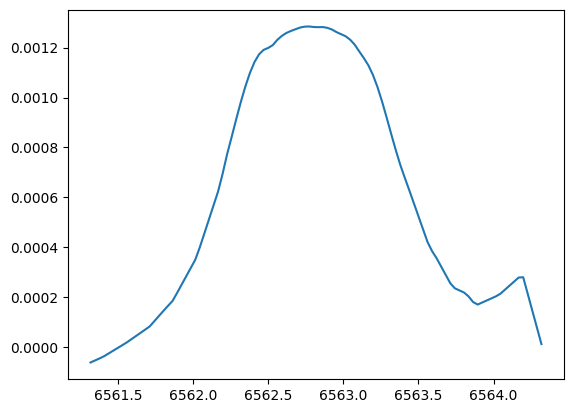

[2.35866216e-11 2.33708083e-11 2.31549951e-11 2.29391818e-11
 2.27233685e-11 2.25075552e-11 2.22917419e-11 2.20759286e-11
 2.18601153e-11 2.16443021e-11 2.14284888e-11 2.12126755e-11
 2.09968622e-11 2.07810489e-11 2.05652356e-11 2.03494224e-11
 2.01336091e-11 1.96694055e-11 1.89568089e-11 1.82442124e-11
 1.75316158e-11 1.68190193e-11 1.61064227e-11 1.53938262e-11
 1.47534389e-11 1.41210751e-11 1.34887113e-11 1.28563474e-11
 1.22239836e-11 1.15916198e-11 1.10081747e-11 1.05388737e-11
 1.00695727e-11 9.60027171e-12 9.13097072e-12 8.66166973e-12
 8.19236874e-12 7.72306775e-12 7.25376676e-12 6.78446578e-12
 6.48544116e-12 6.44183152e-12 6.39822189e-12 6.35461225e-12
 6.31100262e-12 6.35782868e-12 6.51518735e-12 6.67254603e-12
 6.82990470e-12 6.98726338e-12 7.16389954e-12 7.35981319e-12
 7.55572684e-12 7.75164049e-12 7.94755414e-12 8.27499670e-12
 8.71005374e-12 9.14511077e-12 9.58016781e-12 1.00152248e-11
 1.04262645e-11 1.08212925e-11 1.12163205e-11 1.16113485e-11
 1.20063765e-11 1.240140

array([27012502.56404835, 26458182.75240243, 28612656.61141983,
       31571526.68753623, 34150038.62667013, 37737336.43957292,
       37094835.21905662, 37163001.46545761, 38990572.53664798,
       38917261.10565968, 38737059.5741658 , 38516447.39117779,
       40093607.15466759, 40606630.19782063, 41127024.24782644,
       42687784.84981132, 45336170.50329405, 46941175.19345169,
       47228387.72870386, 49899234.24434464, 51327612.58421062,
       52186343.55209808, 51820877.94654444, 51544072.04486448,
       51449765.89692503, 51203074.95532537, 51445669.36105138,
       50786391.57677239, 50423371.4959657 , 49574839.15580461,
       48996044.92169322, 48648716.66259697, 48580629.51589884,
       48075056.25510973, 48303008.46399157, 47563780.10577162,
       46577468.63652821, 45236349.63793908, 44704407.20297394,
       44365540.75253849, 43705345.82281092, 42758637.72696543,
       41294168.19327432, 40736946.61107142, 39685990.60041294,
       38534632.71417671, 37369300.57960

In [62]:
scalefactor = 2.4
name = "Ha17"

print(data[f"quiet_sun_{name}"])

wav, DFD , time, line, std = un2.difference_FD_data(name,data, quiet_sun_subtraction=False, 
                                                          area_factor=60**2/np.pi/959.63**2*scalefactor, add_noise=False)
plt.plot(wav, DFD[5])
plt.show()
weight_func = indicator_function(6561.3490928 , 6564.28848698)

print(std)
stn_direct(weight_func, wav, DFD, std)


In [66]:
def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])


weights = weight_func_to_weights(weight_func, wav)
DS = DFD / std

stn = np.dot(DS, weights)

DS, weights, wav, np.shape(DS), np.shape(DFD), np.shape(std),  np.shape(time), np.shape(stn)


0.0 0.0 0
0.01515152165889625 1.0 1
0.03030303271654834 1.0 1
0.030303032693222952 1.0 1
0.03030303452196852 1.0 1
0.0 1.0 1
0.030303032973548825 1.0 1
0.03030303276455741 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303257859143 1.0 1
0.030303032805955567 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032219275026 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303281418716 1.0 1
0.03030303326937331 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032708681347 1.0 1
0.03030303273346383 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083735 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032764821988 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303271487832 1.0 1
0.030303032714878306 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303276482198 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083763 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0

(array([[ -7640678.36410167,  -7420951.94372749,  -7197129.65717647, ...,
           -121849.66771012,  -2858088.24317287,  -5532889.72838401],
        [ -7563675.44151422,  -7345572.1315949 ,  -7123403.21150167, ...,
            779443.81858722,  -1943981.03002299,  -4606256.49651497],
        [ -6662626.98198287,  -6408849.24744512,  -6150340.9045556 , ...,
           1545821.69390341,  -1201297.16046921,  -3886734.62839347],
        ...,
        [-23232211.8064164 , -23244982.86674153, -23257991.98926209, ...,
         -18180678.54879249, -20609003.71143093, -22982805.40030683],
        [-23194966.51735439, -23212865.04761055, -23231097.21996838, ...,
         -18002117.41553466, -20424095.07605966, -22791691.7840422 ],
        [-23363760.9795013 , -23365464.53729768, -23367199.85069609, ...,
         -17973096.57793854, -20382206.56423359, -22737224.51740646]]),
 array([0.        , 0.01515152, 0.03030303, 0.03030303, 0.03030303,
        0.        , 0.03030303, 0.03030303, 0.       

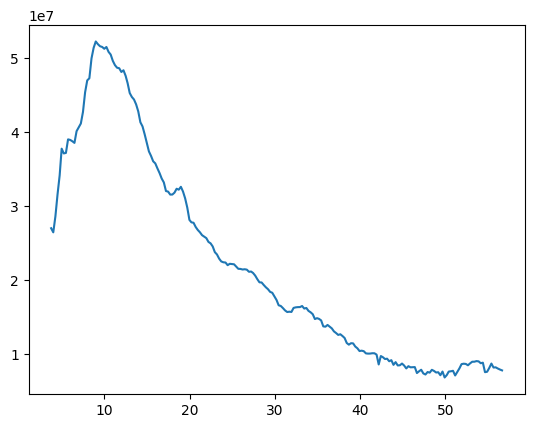

In [67]:
plt.plot(time, stn)